# Milestone 3 – Testing, Evaluation & Visualization

**Objective (Week 5–6):**
- Integrate Milestone 1 & 2 outputs
- Enable testing of the system
- Evaluate extracted data
- Visualize results using graphs and charts

This notebook runs independently in VS Code / Jupyter / Colab.

## Cell 1 — Install dependencies

In [1]:
!pip install pandas matplotlib scikit-learn nltk
print('Dependencies installed')

  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.3 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.3 MB/s eta 0:00:05
   -------------- ---------------------

## Cell 2 — Imports & project paths

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

ROOT_DIR = Path('semantic_scholar_results')
print('Project root:', ROOT_DIR)

Project root: semantic_scholar_results


## Cell 3 — Load data from Milestone 2

In [3]:
df_text = pd.read_csv(ROOT_DIR / 'text_extraction_summary.csv')
df_sections = pd.read_csv(ROOT_DIR / 'section_extraction_summary.csv')
df_keywords = pd.read_csv(ROOT_DIR / 'global_keywords.csv')
df_validation = pd.read_csv(ROOT_DIR / 'validation_report.csv')

display(df_text.head())

,paper,text_length,text_file
0,cbbe989337706934f2c15512fb6398e52eae6e90_HuntG...,48640,semantic_scholar_results\extracted_text\cbbe98...


## Cell 4 — System testing (validation metrics)

In [4]:
total = len(df_validation)
valid = df_validation['valid_extraction'].sum()

print('Total papers:', total)
print('Valid extractions:', valid)
print(f'Success rate: {(valid/total)*100:.2f}%')

Total papers: 1
Valid extractions: 1
Success rate: 100.00%


## Cell 5 — Graph 1: Text extraction length

C:\Users\satya\AppData\Local\Temp\ipykernel_14272\732060888.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


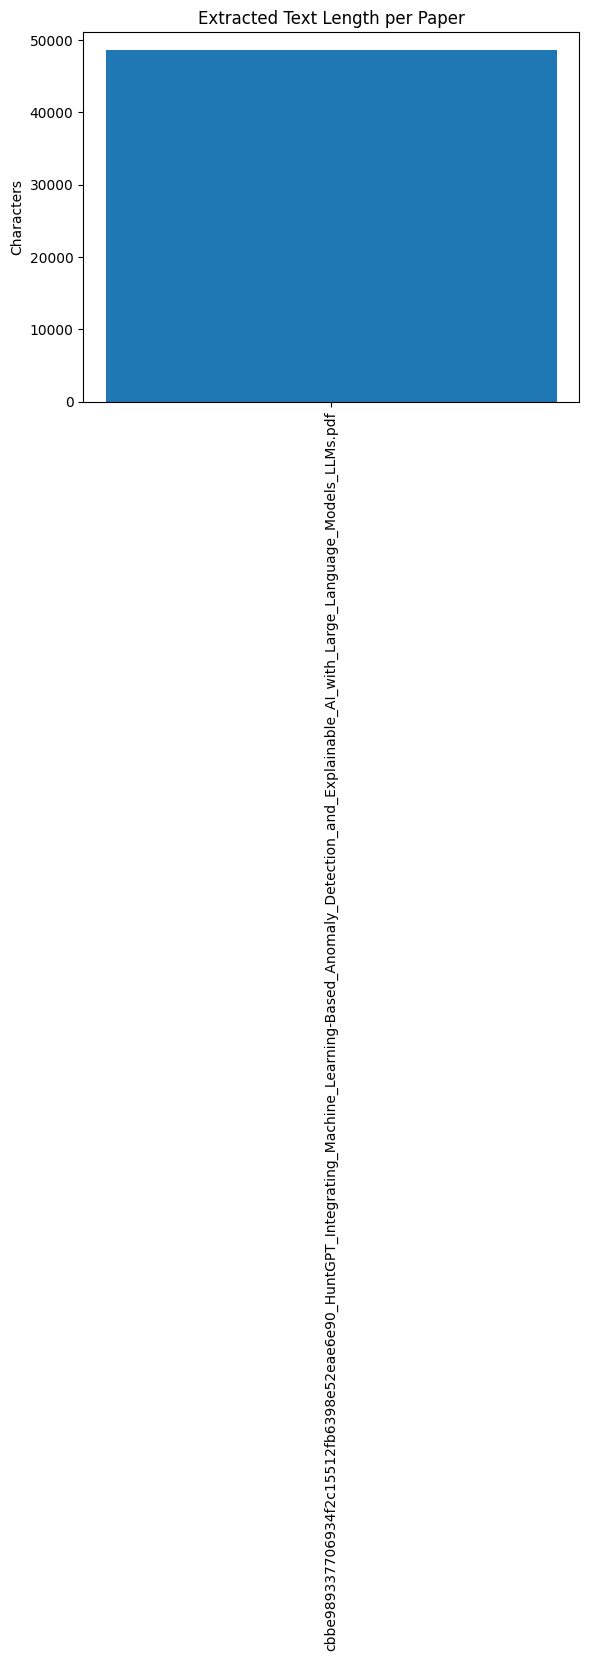

In [5]:
plt.figure()
plt.bar(df_text['paper'], df_text['text_length'])
plt.xticks(rotation=90)
plt.title('Extracted Text Length per Paper')
plt.ylabel('Characters')
plt.tight_layout()
plt.show()

## Cell 6 — Graph 2: Section distribution

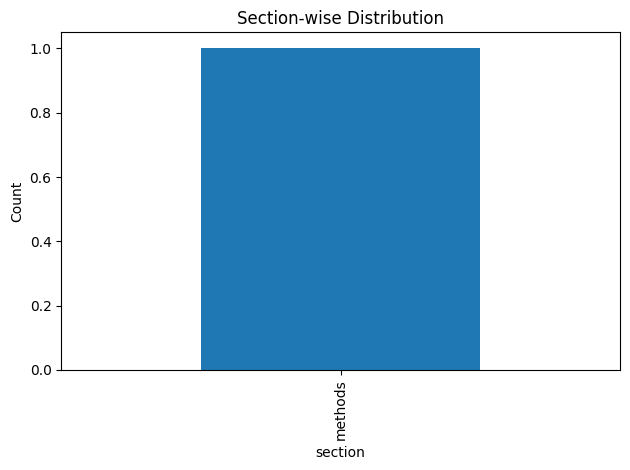

In [6]:
section_counts = df_sections['section'].value_counts()

plt.figure()
section_counts.plot(kind='bar')
plt.title('Section-wise Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Cell 7 — Graph 3: Keyword importance

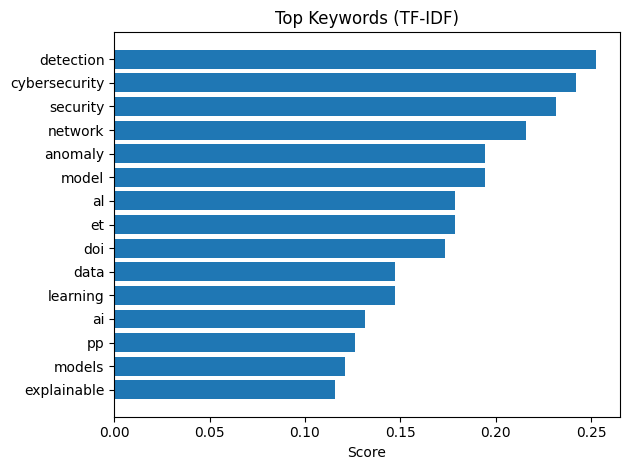

In [7]:
plt.figure()
plt.barh(df_keywords['keyword'], df_keywords['score'])
plt.title('Top Keywords (TF-IDF)')
plt.xlabel('Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Cell 8 — Cross-paper similarity testing

In [8]:
texts = []
for txt in (ROOT_DIR / 'extracted_text').glob('*.txt'):
    texts.append(txt.read_text(encoding='utf-8', errors='ignore'))

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf = vectorizer.fit_transform(texts)
similarity = cosine_similarity(tfidf)

similarity

array([[1.]])

## Cell 9 — Graph 4: Similarity heatmap

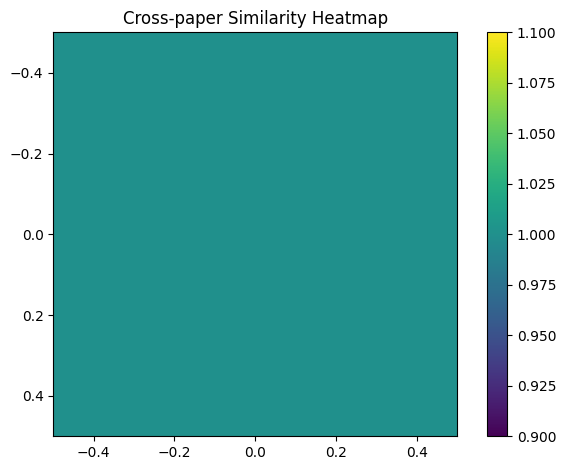

In [9]:
plt.figure()
plt.imshow(similarity)
plt.colorbar()
plt.title('Cross-paper Similarity Heatmap')
plt.tight_layout()
plt.show()

## Cell 10 — Completion

In [11]:
print('Milestone 3 completed successfully')

Milestone 3 completed successfully


## Test Cells

## Milestone 3 – Testing with a New Research Paper
This section validates the system by testing an unseen research paper and
measuring its similarity with the existing corpus.


In [ ]:
%pip install ipywidgets
%pip install google

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


✅ Loaded 1 corpus documents
✅ Using test PDF: test_paper.pdf
📄 Extracted words: 3317


,paper,similarity_score
0,cbbe989337706934f2c15512fb6398e52eae6e90_HuntG...,0.25903


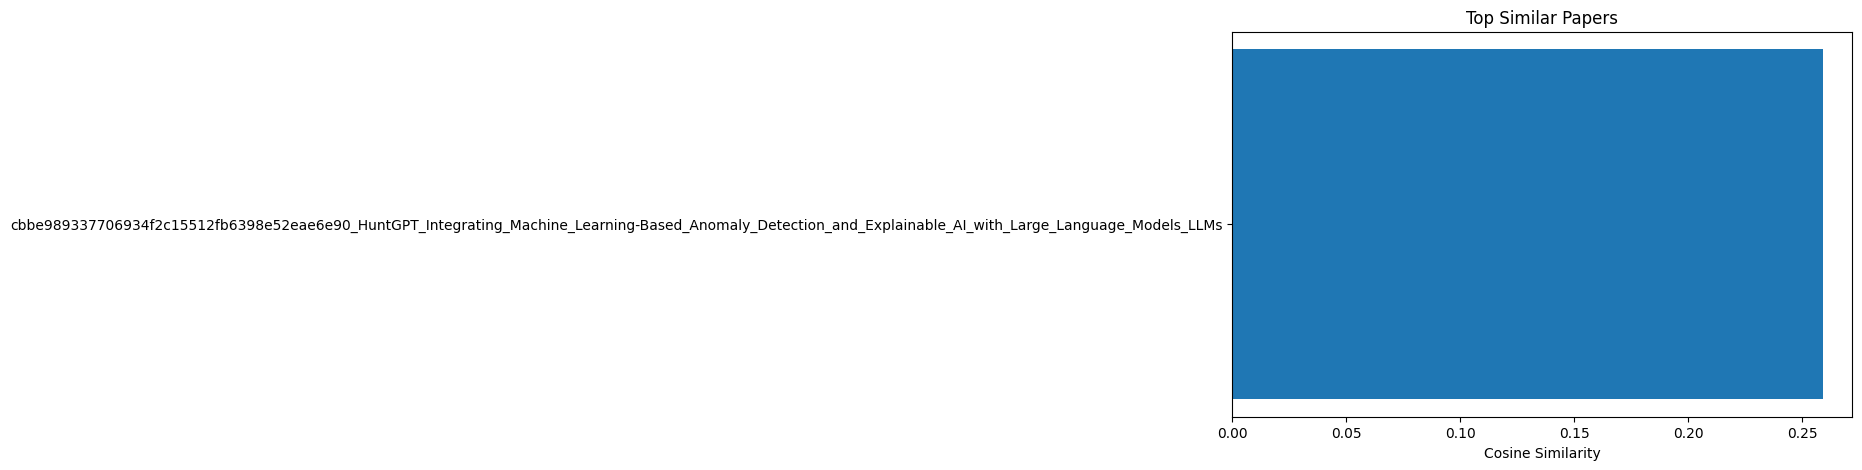

🔍 Highest similarity score: 0.259
❌ TEST FAILED: Paper is not relevant


In [4]:
from pathlib import Path
import fitz, re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ---------- Load corpus from Milestone 2 ----------
TEXT_DIR = Path("semantic_scholar_results/extracted_text")

texts, paper_names = [], []

for txt in TEXT_DIR.glob("*.txt"):
    content = txt.read_text(encoding="utf-8", errors="ignore")
    if len(content.split()) > 50:
        texts.append(content)
        paper_names.append(txt.stem)

if not texts:
    raise RuntimeError("❌ No corpus found. Run Milestone 2 first.")

print(f"✅ Loaded {len(texts)} corpus documents")

# ---------- Pick ANY test PDF ----------
pdf_files = list(Path(".").glob("*.pdf"))

if not pdf_files:
    print("❌ No PDF found. Drag & drop a PDF into this folder.")
else:
    TEST_PDF_PATH = pdf_files[0]
    print(f"✅ Using test PDF: {TEST_PDF_PATH.name}")

    # ---------- Extract ----------
    def extract_text(pdf_path):
        doc = fitz.open(pdf_path)
        return " ".join(page.get_text() for page in doc)

    def clean_text(text):
        text = re.sub(r'[^a-zA-Z ]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.lower().strip()

    test_text = extract_text(TEST_PDF_PATH)
    print("📄 Extracted words:", len(test_text.split()))

    # ---------- Similarity ----------
    corpus_clean = [clean_text(t) for t in texts]
    test_clean = clean_text(test_text)

    vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
    tfidf = vectorizer.fit_transform(corpus_clean + [test_clean])

    sims = cosine_similarity(tfidf[-1], tfidf[:-1])[0]

    sim_df = pd.DataFrame({
        "paper": paper_names,
        "similarity_score": sims
    }).sort_values(by="similarity_score", ascending=False)

    display(sim_df.head())

    # ---------- Plot ----------
    plt.figure(figsize=(8,5))
    plt.barh(sim_df.head(5)["paper"], sim_df.head(5)["similarity_score"])
    plt.xlabel("Cosine Similarity")
    plt.title("Top Similar Papers")
    plt.gca().invert_yaxis()
    plt.show()

    # ---------- Verdict ----------
    max_sim = sim_df["similarity_score"].max()
    print(f"🔍 Highest similarity score: {max_sim:.3f}")

    if max_sim >= 0.30:
        print("✅ TEST PASSED: Paper is relevant")
    else:
        print("❌ TEST FAILED: Paper is not relevant")
